In [23]:
from svg import *
from skimage import io
from skimage.filters import threshold_otsu
from skimage.draw import polygon2mask
import matplotlib.pyplot as plt
from matplotlib.path import Path

# Set default parameters for plots
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['image.cmap'] = 'gray'

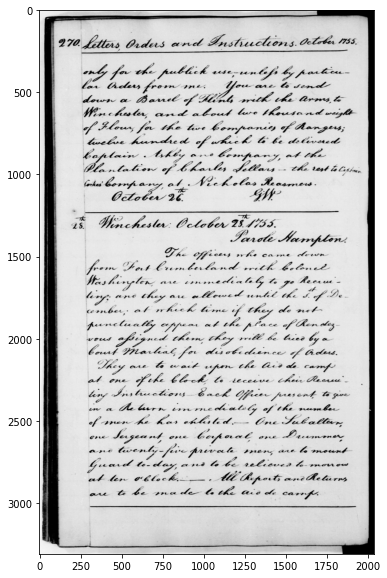

In [24]:
p270svg = "../res/ground-truth/locations/270.svg"
svg = SVG(p270svg)

p270jpg = "../res/images/270.jpg"
img = io.imread(p270jpg, as_gray=True)

plt.imshow(img)

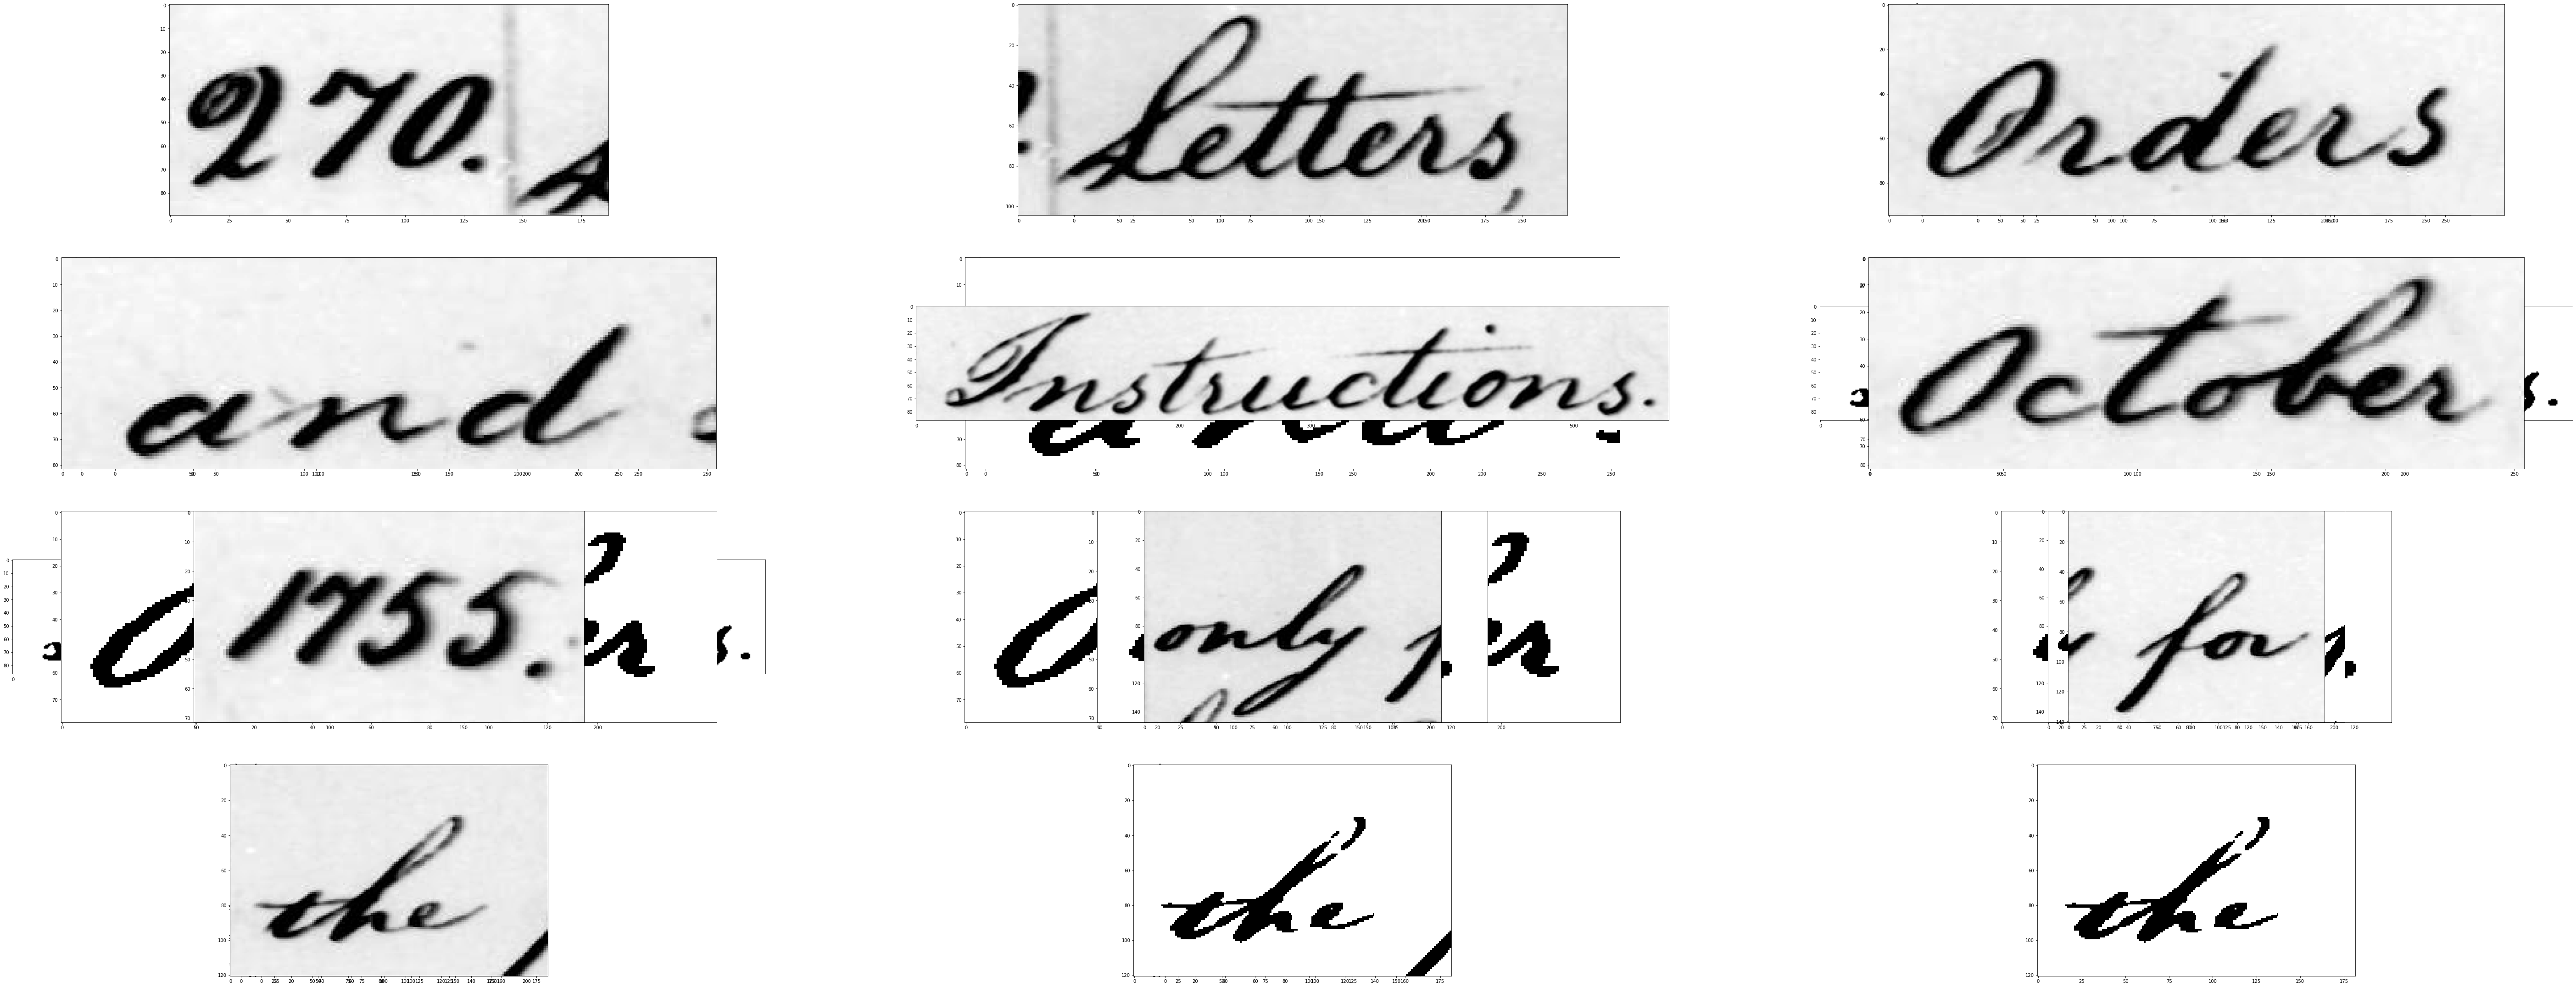

In [25]:
words, masks = svg.words_masks(img)

fig = plt.figure(figsize=(100, 100))  # width, height in inches

for i in range(10):
    w = words[i]
    otsu = img > threshold_otsu(w)
    masked = otsu | ~ masks[i]
    
    sub = fig.add_subplot(10, 1, i + 1)
    sub.imshow(img)
    sub = fig.add_subplot(10, 2, i + 2)
    sub.imshow(otsu)
    sub = fig.add_subplot(10, 3, i + 3)
    sub.imshow(masked)